## Validation script for checking model architecture, solver, data augmentation

In [1]:
from image_process import *
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import jaccard_similarity_score as jaccard
import glob
from sklearn.metrics import *
from fconv_out import *

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

ImportError: No module named image_process

In [76]:
test_patients = read_list('test_patients')
all_images = glob.glob('Data/*original*')
test_images = [i for i in all_images if i.split('_')[0].strip('Data/') in test_patients]

In [77]:
# Take a random subset of 10 patients
test_images = np.random.choice(test_images, size=5)

In [78]:
results = fconv_out(test_images, list_flag = True, 
                    model = 'Model_C_1/model_1_iter_15500.caffemodel', 
                    deploy = 'Model_C_1/deploy.prototxt',
                    mean = 'DB/final_64_images_train/final_64_mean')

Pulling out filenames
working on file: 	 Data/14213_500_f00011_original.tif
(2000, 2000, 3)
(2068, 2068, 3)
Row + Col displace:	 (0/ 4) (0/ 4) 
(2064, 2064, 3)
Time since beginning:	 0.283497
Row + Col displace:	 (0/ 4) (1/ 4) 
(2064, 2064, 3)
Time since beginning:	 0.480963
Row + Col displace:	 (0/ 4) (2/ 4) 
(2064, 2064, 3)
Time since beginning:	 0.682952
Row + Col displace:	 (0/ 4) (3/ 4) 
(2064, 2064, 3)
Time since beginning:	 0.886969
Row + Col displace:	 (1/ 4) (0/ 4) 
(2064, 2064, 3)
Time since beginning:	 1.090413
Row + Col displace:	 (1/ 4) (1/ 4) 
(2064, 2064, 3)
Time since beginning:	 1.273470
Row + Col displace:	 (1/ 4) (2/ 4) 
(2064, 2064, 3)
Time since beginning:	 1.472584
Row + Col displace:	 (1/ 4) (3/ 4) 
(2064, 2064, 3)
Time since beginning:	 1.676908
Row + Col displace:	 (2/ 4) (0/ 4) 
(2064, 2064, 3)
Time since beginning:	 1.887184
Row + Col displace:	 (2/ 4) (1/ 4) 
(2064, 2064, 3)
Time since beginning:	 2.112583
Row + Col displace:	 (2/ 4) (2/ 4) 
(2064, 2064, 3)


In [79]:
# Match each result to its ground truth - determine true/false positive/negatives
nuc_images = {}; patients = []
data_dir = 'Data/'

train = read_list('train_patients')
test = read_list('test_patients')

for i, f in enumerate(test_images):
        f = f.split('_original')[0].strip(data_dir)
        nuc_images[f] = {'truth': cv2.imread(data_dir + f + '_mask.png'),
                        'pred': results[i]} # bad idea... switch to dictionary


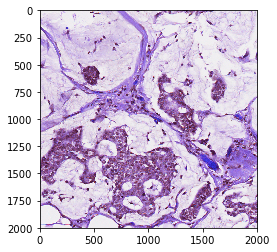

In [92]:
plt.figure(figsize=(10))
plt.imshow(cv2.imread(test_images[4]))

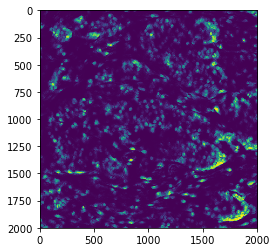

In [100]:
plt.imshow(pred[4,:,:])

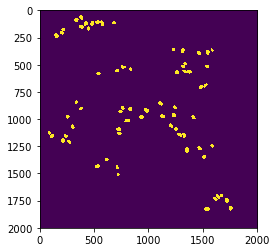

In [89]:
plt.imshow(truth[4,:,:])

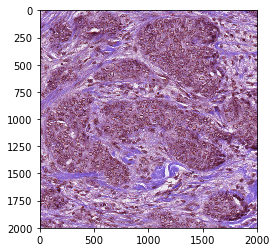

In [91]:
plt.imshow(cv2.imread(test_images[3]))

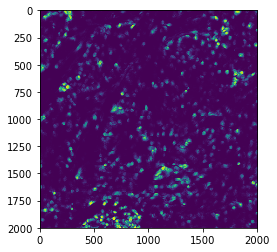

In [98]:
plt.imshow(pred[3,:,:])

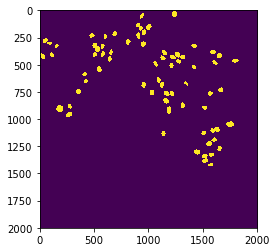

In [88]:
plt.imshow(truth[3,:,:])

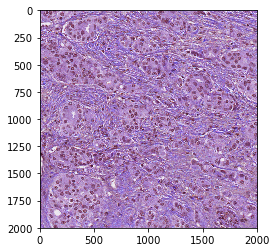

In [93]:
plt.imshow(cv2.imread(test_images[2]))

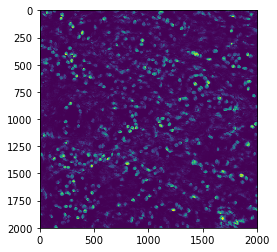

In [99]:
plt.imshow(pred[2,:,:])

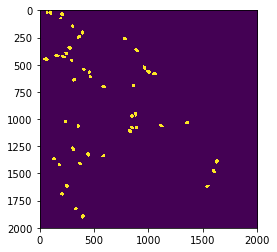

In [87]:
plt.imshow(truth[2,:,:])

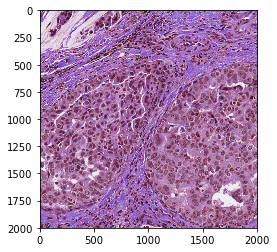

In [94]:
plt.imshow(cv2.imread(test_images[1]))

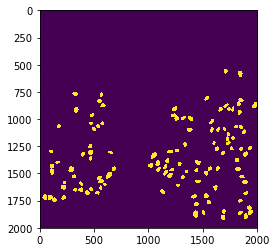

In [86]:
plt.imshow(truth[1,:,:])

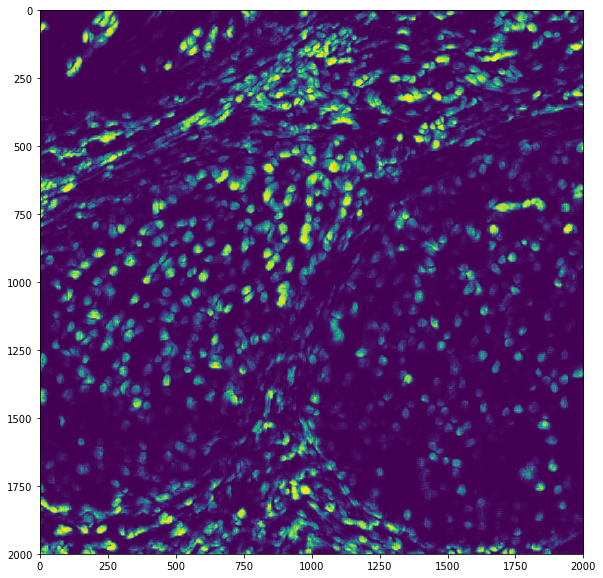

In [105]:
plt.figure(figsize=(10,10))
plt.imshow(pred[1,:,:])

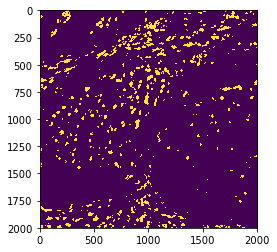

In [107]:
plt.imshow(binarize(pred[1,:,:],0.5))

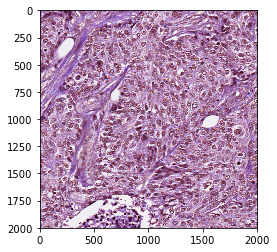

In [102]:
plt.imshow(cv2.imread(test_images[0]))

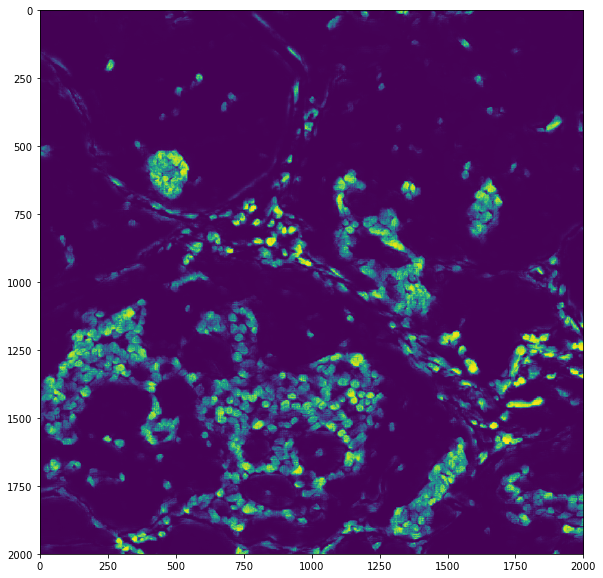

In [106]:
plt.figure(figsize=(10,10))
plt.imshow(pred[0,:,:])

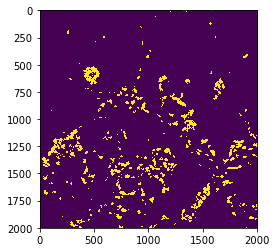

In [109]:
plt.imshow(binarize(pred[0,:,:], 0.5))

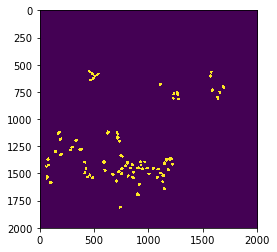

In [85]:
plt.imshow(truth[0,:,:])

In [80]:
truth = []; pred = []
for item in nuc_images.values():
    truth.append(item['truth'][:,:,1]/255)
    pred.append(item['pred'])
truth = np.array(truth)
pred = np.array(pred)

In [39]:
# binarize a given image matrix
def binarize(image, thresh):
    binary = np.zeros(image.shape)
    binary[image>thresh] = 1
    return binary

In [40]:
def get_stats(truth, pred):
    t = truth.flatten(); p = pred.flatten();
    fpr, tpr, _ = precision_recall_curve(t,p)
    fscore = precision_recall_fscore_support(t,p)[2][1]
    return fpr[1], tpr[1], fscore

In [41]:
def TPR_FPR(truth,pred_b):
    truth = truth.flatten(); pred_b = pred_b.flatten();
    TP = np.sum(np.logical_and((truth == 1.),(pred_b==1.)))
    print 'TP', TP
    TN = np.sum(np.logical_and((truth == 0.),(pred_b==0.)))
    print 'TN', TN
    FP = np.sum(np.logical_and((truth == 0.),(pred_b==1.)))
    print 'FP', FP
    FN = np.sum(np.logical_and((truth == 1.),(pred_b==0.)))
    print 'FN', FN
   
    TPR = TP/float(TP + FN + 1e-10)
    print 'TPR', TPR
    
    FPR = FP/float(FP + TN + 1e-10)
    print 'FPR', FPR
    
    precision = TP/float(TP + FP + 1e-10)
    recall = TPR
    
    F = 2*(precision*recall)/(precision+recall)
    
    return TPR, FPR, precision, F

In [81]:
fpr = []; tpr = []
precision = []; fscore = []
#roc_auc_score(truth,pred)
for thresh in np.arange(0,1.1,0.1):
    print thresh
    pred_b = binarize(pred, thresh)
    t, f, p, fsc = TPR_FPR(truth, pred_b)
    fpr.append(f); tpr.append(t)
    precision.append(p); fscore.append(fsc)
    print '-----'

0.0
TP 446857
TN 0
FP 19553143
FN 0
TPR 1.0
FPR 1.0
-----
0.1
TP 214998
TN 16181852
FP 3371291
FN 231859
TPR 0.481133785529
FPR 0.172416833447
-----
0.2
TP 149736
TN 17439066
FP 2114077
FN 297121
TPR 0.335087063647
FPR 0.108119548862
-----
0.3
TP 109686
TN 18082984
FP 1470159
FN 337171
TPR 0.245461075915
FPR 0.0751878611024
-----
0.4
TP 80815
TN 18507115
FP 1046028
FN 366042
TPR 0.180852039914
FPR 0.0534966680293
-----
0.5
TP 57168
TN 18815661
FP 737482
FN 389689
TPR 0.127933544736
FPR 0.0377168008233
-----
0.6
TP 37332
TN 19051678
FP 501465
FN 409525
TPR 0.0835435049692
FPR 0.0256462605526
-----
0.7
TP 20632
TN 19236543
FP 316600
FN 426225
TPR 0.0461713702594
FPR 0.0161917702949
-----
0.8
TP 7988
TN 19381918
FP 171225
FN 438869
TPR 0.0178759647941
FPR 0.00875690419694
-----
0.9
TP 1460
TN 19491576
FP 61567
FN 445397
TPR 0.00326726447163
FPR 0.00314870095309
-----
1.0
TP 0
TN 19553143
FP 0
FN 446857
TPR 0.0
FPR 0.0
-----


/home/yr897021/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars


In [83]:
fscore[5]

0.092094527054619901

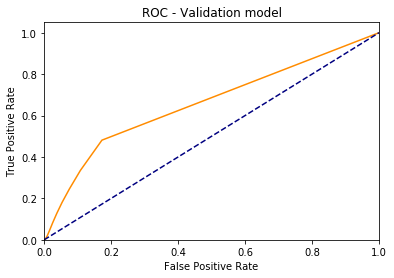

In [82]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Validation model')
plt.show()

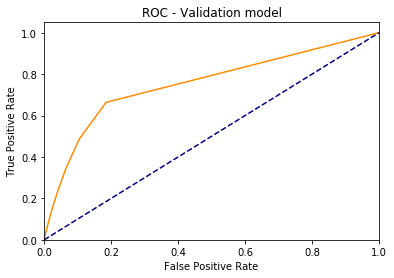

In [27]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Validation model')
plt.legend(loc="lower right")
plt.show()


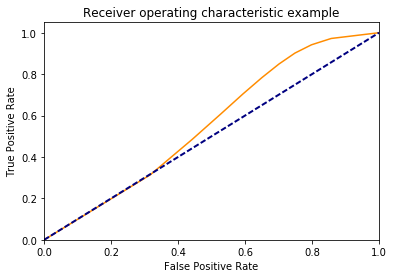

In [338]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Lol is this for real...

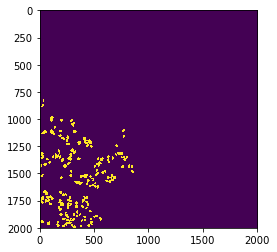

In [152]:
plt.imshow(truth)

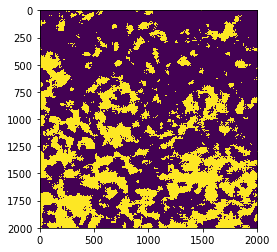

In [155]:
plt.imshow(pred_b)

In [14]:
jaccard(truth.flatten(), pred.flatten())

1.5e-05

In [29]:
def dice(pred, truth, k):
    return np.sum(pred[truth==k])*2.0 / (np.sum(pred) + np.sum(truth))

## Test script for testing against external dataset and unseen data

In [133]:
# Read in external images and link to masks
test_mask_path = 'Data/test_masks/'
test_image_path = 'Data/test_images/'
data_dir = 'Data/'
test_masks = read_filenames(test_mask_path)

In [138]:
test_set = np.random.choice(test_masks,size = 15)

In [215]:
test_images

['Data/test_images/ytma10_010704_malignant3_ccd.tif',
 'Data/test_images/ytma49_111303_malignant2_ccd.tif',
 'Data/test_images/ytma49_042003_malignant2_ccd.tif',
 'Data/test_images/ytma23_022103_benign2_ccd.tif',
 'Data/test_images/ytma49_042003_malignant2_ccd.tif',
 'Data/test_images/ytma10_010704_benign2_ccd.tif',
 'Data/test_images/ytma49_111003_malignant2_ccd.tif',
 'Data/test_images/ytma23_022103_benign2_ccd.tif',
 'Data/test_images/ytma49_042203_malignant1_ccd.tif',
 'Data/test_images/ytma10_010704_malignant1_ccd.tif',
 'Data/test_images/ytma12_010804_malignant1_ccd.tif',
 'Data/test_images/ytma55_030603_benign6_ccd.tif',
 'Data/test_images/ytma55_030603_benign3_ccd.tif',
 'Data/test_images/ytma12_010804_malignant1_ccd.tif',
 'Data/test_images/ytma10_010704_malignant2_ccd.tif']

In [184]:
# In case of single image
#test_set = [test_mask_path + 'ytma49_111003_benign1.TIF']
#test_sample = [test_image_path + 'NormMMytma49_111003_benign1_ccd.tif']

In [334]:
test_images = [test_image_path + 'NormHS' + t.strip('.TIF')+'_ccd.tif' for t in test_set]

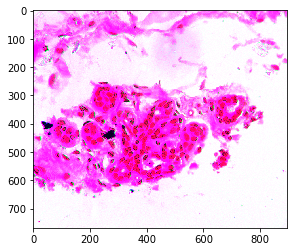

In [281]:
plt.imshow(cv2.imread(test_image_path + 'Normytma49_111003_benign1_ccd.tif'))

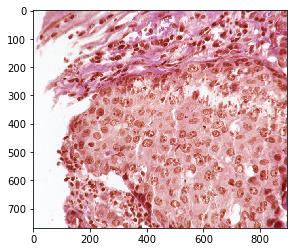

In [324]:
plt.imshow(cv2.imread(test_images[6]))

In [335]:
test_results = fconv_out(test_images, list_flag = True, 
                    model = 'Model_C_SH/model_1_iter_10000.caffemodel', 
                    deploy = 'Model_C_1/deploy_test.prototxt',
                    mean = 'DB/NormHS_fix/NormHS_fix_mean')

Pulling out filenames
./output//NormHSytma10_010704_malignant3_ccd_prob_model_1_iter_10000.caffemodel.png <------------------------ 
working on file: 	 Data/test_images/NormHSytma10_010704_malignant3_ccd.tif
(768, 896, 3)
(836, 964, 3)
Row + Col displace:	 (0/ 4) (0/ 4) 
(832, 960, 3)
Time since beginning:	 0.308782
Row + Col displace:	 (0/ 4) (1/ 4) 
(832, 960, 3)
Time since beginning:	 0.409619
Row + Col displace:	 (0/ 4) (2/ 4) 
(832, 960, 3)
Time since beginning:	 0.508346
Row + Col displace:	 (0/ 4) (3/ 4) 
(832, 960, 3)
Time since beginning:	 0.599238
Row + Col displace:	 (1/ 4) (0/ 4) 
(832, 960, 3)
Time since beginning:	 0.700763
Row + Col displace:	 (1/ 4) (1/ 4) 
(832, 960, 3)
Time since beginning:	 0.799549
Row + Col displace:	 (1/ 4) (2/ 4) 
(832, 960, 3)
Time since beginning:	 0.901158
Row + Col displace:	 (1/ 4) (3/ 4) 
(832, 960, 3)
Time since beginning:	 1.002915
Row + Col displace:	 (2/ 4) (0/ 4) 
(832, 960, 3)
Time since beginning:	 1.104588
Row + Col displace:	 (2/ 4

In [326]:
# Match each result to its ground truth - determine true/false positive/negatives
nuc_images = {}; patients = []

for i, f in enumerate(test_set):
        img_id = f.split('.TIF')[0]
        nuc_images[img_id] = {'truth': cv2.imread(test_mask_path + f),
                        'pred': test_results[i]} # bad idea... switch to dictionary

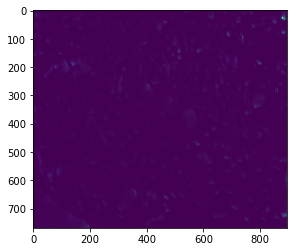

In [327]:
plt.imshow(nuc_images.values()[6]['pred'])

In [328]:
truth = []; pred = []
for item in nuc_images.values():
    truth.append(item['truth'][:,:,1]/255)
    pred.append(item['pred'])
truth = np.array(truth)
pred = np.array(pred)

In [329]:
fpr = []; tpr = []
precision = []; fscore = []
#roc_auc_score(truth,pred)
for thresh in np.arange(0,1.1,0.1):
    print thresh
    pred_b = binarize(pred, thresh)
    t, f, p, fsc = TPR_FPR(truth, pred_b)
    fpr.append(f); tpr.append(t)
    precision.append(p); fscore.append(fsc)
    print '-----'

0.0
TP 139830
TN 0
FP 8117706
FN 0
TPR 1.0
FPR 1.0
-----
0.1
TP 474
TN 8102744
FP 14962
FN 139356
TPR 0.00338983050847
FPR 0.0018431315448
-----
0.2
TP 183
TN 8112598
FP 5108
FN 139647
TPR 0.00130873203175
FPR 0.000629241807969
-----
0.3
TP 82
TN 8115442
FP 2264
FN 139748
TPR 0.000586426374884
FPR 0.000278896525693
-----
0.4
TP 32
TN 8116162
FP 1544
FN 139798
TPR 0.000228849317028
FPR 0.000190201517522
-----
0.5
TP 8
TN 8116420
FP 1286
FN 139822
TPR 5.7212329257e-05
FPR 0.000158419139594
-----
0.6
TP 0
TN 8116595
FP 1111
FN 139830
TPR 0.0
FPR 0.000136861325108
-----
0.7
TP 0
TN 8116796
FP 910


/home/yr897021/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars


FN 139830
TPR 0.0
FPR 0.000112100635327
-----
0.8
TP 0
TN 8117077
FP 629
FN 139830
TPR 0.0
FPR 7.74849446383e-05
-----
0.9
TP 0
TN 8117502
FP 204
FN 139830
TPR 0.0
FPR 2.51302523151e-05
-----
1.0
TP 0
TN 8117706
FP 0
FN 139830
TPR 0.0
FPR 0.0
-----


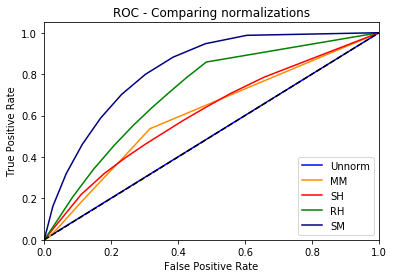

In [317]:
plt.figure()
lw = 2
plt.plot(fpr_base, tpr_base, color='blue')
plt.plot(fpr_mm, tpr_mm, color='darkorange')
plt.plot(fpr_sh, tpr_sh, color='red')
plt.plot(fpr_rh, tpr_rh, color='green')
plt.plot(fpr_sm, tpr_sm, color='navy')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Comparing normalizations')
plt.legend(['Unnorm', 'MM', 'SH', 'RH', 'SM'])
plt.show()

In [254]:
#fpr_mm, tpr_mm = fpr, tpr

In [233]:
#fpr_sh, tpr_sh = fpr, tpr

In [148]:
#fpr_base, tpr_base = fpr,tpr

In [302]:
#fpr_rh, tpr_rh = fpr, tpr

In [315]:
#fpr_sm, tpr_sm = fpr, tpr

In [256]:
jaccard(truth.flatten(),binarize(pred,0.5).flatten())

0.88086942642454114

In [318]:
dice(truth.flatten(),binarize(pred,0.5).flatten(),1)

0.092859643644552944

In [330]:
fscore[5]

0.0001133754712168021

In [331]:
precision[5]

0.0061823802163828295

In [332]:
tpr[5]

5.7212329256954838e-05

In [333]:
auc(fpr,tpr)

0.50077345059638112